In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
%matplotlib inline
sns.set(color_codes=True)

## Problem 1: A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [2]:
#Reading the data
wholesale=pd.read_csv("Wholesale+Customers+Data.csv")

In [3]:
wholesale.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
wholesale.shape

(440, 9)

In [5]:
wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [6]:
wholesale.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

So the Wholesale Customer Data consists of 440 rows and 9 columns, out of which 2 columns are categorical of object type and the rest are continuous of integer type. There are no null values for any of the columns. So the dataset is clean from that perspective.
We have a column Buyer/Spender of continuous type which is not for our use of the analysis. So we are dropping this column.

In [7]:
wholesale1=wholesale.drop(['Buyer/Spender'],axis=1)

In [8]:
wholesale1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


## 1.1 Use methods of descriptive statistics to summarize data. 

In [9]:
wholesale1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


## The wholesale customer data is a dataset which has information of annual spendings in the stores of Portugal across different regions and channels.
> ## Channel- It is a categorical variable in the dataset whose domain value consists of Hotel and Retail. It has 440 rows out of which 298 rows have data for transactions in Hotel and the rest rows have data for transactions in Retail.
> ## Region- It is a categorical variable in the dataset whose domain value consists of Lisbon, Oporto and Other. It has 440 rows out of which 316 rows have data for transactions in Hotel and the rest rows have data for transactions in Lisbon and Oporto.
## There are 6 different varieties of products in these stores which are as follows:-
> ## Fresh- This is a continuous variable in the dataset which consists of spending done on Fresh variety of products and has the following characteristics:-
> - Mean = 12000.297727
> - Standard deviation= 12647.328865
> - Minimum = 3.0
> - Maximum = 112151.0
> - Range = Max - Min = 112148
> - Q1= 3127.75
> - Q2= 8504.0
> - Q3= 16933.75
> - Interquartile Range= Q3 - Q1 = 13806
>
> ## Milk- This is a continuous variable in the dataset which consists of spending done on Milk and has the following characteristics:-
> - Mean = 5796.265909
> - Standard deviation= 7380.377175
> - Minimum = 55.0
> - Maximum = 73498.0
> - Range = Max - Min = 73443
> - Q1= 1533.0
> - Q2= 3627.0
> - Q3= 7190.25
> - Interquartile Range= Q3 - Q1 = 5657.25
>
> ## Grocery- This is a continuous variable in the dataset which consists of spending done on Grocery items and has the following characteristics:-
> - Mean = 7951.277273
> - Standard deviation= 9503.162829
> - Minimum = 3.0
> - Maximum = 92780.0
> - Range = Max - Min = 92777.0
> - Q1= 2153.0
> - Q2= 4755.5
> - Q3= 10655.75
> - Interquartile Range= Q3 - Q1 = 8502.75
>
> ## Frozen- This is a continuous variable in the dataset which consists of spending done on Frozen items and has the following characteristics:-
> - Mean = 3071.931818
> - Standard deviation= 4854.673333
> - Minimum = 25.0
> - Maximum = 60869.0
> - Range = Max - Min = 60844.0
> - Q1= 742.25
> - Q2= 1526.0
> - Q3= 3554.25
> - Interquartile Range= Q3 - Q1 = 2812.0
>
> ## Detergents_Paper- This is a continuous variable in the dataset which consists of spending done on Detergents_Paper and has the following characteristics:-
> - Mean = 2881.493182
> - Standard deviation= 4767.854448
> - Minimum = 3.0
> - Maximum = 40827.0
> - Range = Max - Min = 60844.0
> - Q1= 256.75
> - Q2= 816.5
> - Q3= 3922.0
> - Interquartile Range= Q3 - Q1 = 3665.25
>
> ## Delicatessen- This is a continuous variable in the dataset which consists of spending done on Delicatessen and has the following characteristics:-
> - Mean = 1524.870455
> - Standard deviation= 2820.105937
> - Minimum = 3.0
> - Maximum = 47943.0
> - Range = Max - Min = 47940.0
> - Q1= 408.25
> - Q2= 965.5
> - Q3= 1820.25
> - Interquartile Range= Q3 - Q1 = 1412.0


## 1.1 Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [12]:
wholesale1['Total Spending']=wholesale1.iloc[:,2:].sum(axis=1)

In [13]:
wholesale1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
0,Retail,Other,12669,9656,7561,214,2674,1338,102336
1,Retail,Other,7057,9810,9568,1762,3293,1776,99798
2,Retail,Other,6353,8808,7684,2405,3516,7844,109830
3,Hotel,Other,13265,1196,4221,6404,507,1788,82143
4,Retail,Other,22615,5410,7198,3915,1777,5185,138300


In [21]:
df_region=wholesale1.groupby(by="Region")['Total Spending'].sum().sort_values()
df_region

Region
Oporto     4665264
Lisbon     7160439
Other     32032797
Name: Total Spending, dtype: int64

Text(0.5, 1.0, 'Total spending per region')

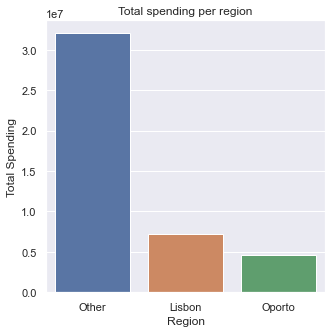

In [25]:
plt.figure(figsize=(5,5))
sns.barplot(x=wholesale1['Region'],y=wholesale1['Total Spending'],estimator=np.sum,ci=None)
plt.title('Total spending per region')

In [26]:
df_channel=wholesale1.groupby(by="Channel")['Total Spending'].sum().sort_values()
df_channel

Channel
Retail    19859793
Hotel     23998707
Name: Total Spending, dtype: int64

Text(0.5, 1.0, 'Total spending per channel')

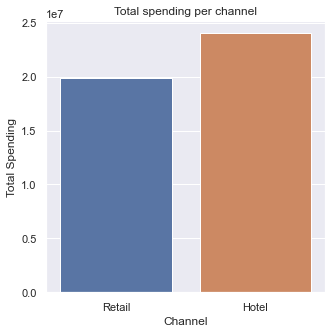

In [27]:
plt.figure(figsize=(5,5))
sns.barplot(x=wholesale1['Channel'],y=wholesale1['Total Spending'],estimator=np.sum,ci=None)
plt.title('Total spending per channel')

From the above calculations and plot charts, we can infer that amongst all the regions, Other region has the maximum spending and Oporto has the lowest spending.
And, amongst the two channels, Hotel has more spending than Retail.

## 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [28]:
df_freshByRegion=wholesale1.groupby(by='Region')['Fresh'].sum()
df_freshByRegion1=df_freshByRegion.reset_index()

In [29]:
df_freshByRegion1

,Region,Fresh
0,Lisbon,854833
1,Oporto,464721
2,Other,3960577


(array([0, 1, 2]),
 [Text(0, 0, 'Lisbon'), Text(1, 0, 'Oporto'), Text(2, 0, 'Other')])

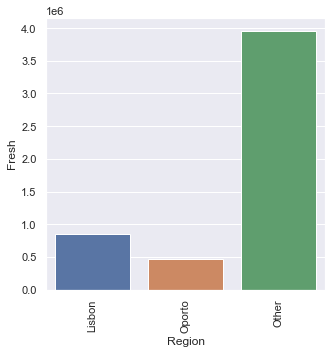

In [32]:
plt.figure(figsize=(5,5))
sns.barplot(x='Region',y='Fresh',data=df_freshByRegion1)
plt.xticks(rotation=90)

In [33]:
df_freshByChannel=wholesale1.groupby(by='Channel')['Fresh'].sum()
df_freshByChannel1=df_freshByChannel.reset_index()

(array([0, 1]), [Text(0, 0, 'Hotel'), Text(1, 0, 'Retail')])

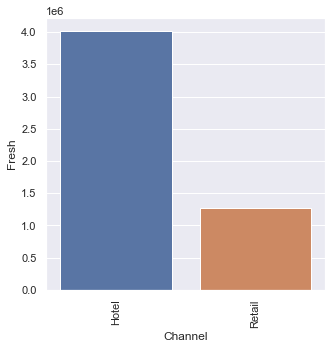

In [34]:
plt.figure(figsize=(5,5))
sns.barplot(x='Channel',y='Fresh',data=df_freshByChannel1,estimator=np.sum,ci=None)
plt.xticks(rotation=90)

In [35]:
df_milkByRegion=wholesale1.groupby(by='Region')['Milk'].sum()
df_milkByRegion1=df_milkByRegion.reset_index()

(array([0, 1, 2]),
 [Text(0, 0, 'Lisbon'), Text(1, 0, 'Oporto'), Text(2, 0, 'Other')])

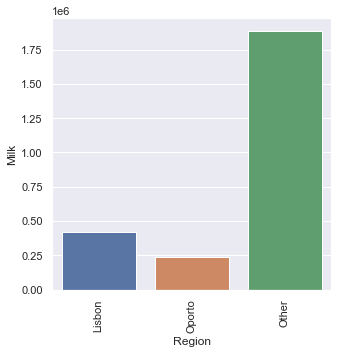

In [36]:
plt.figure(figsize=(5,5))
sns.barplot(x='Region',y='Milk',data=df_milkByRegion1,estimator=np.sum,ci=None)
plt.xticks(rotation=90)

In [37]:
df_milkByChannel=wholesale1.groupby(by='Channel')['Milk'].sum()
df_milkByChannel1=df_milkByChannel.reset_index()

(array([0, 1]), [Text(0, 0, 'Hotel'), Text(1, 0, 'Retail')])

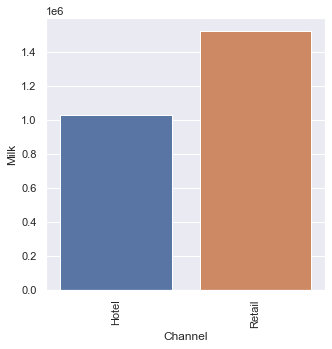

In [38]:
plt.figure(figsize=(5,5))
sns.barplot(x='Channel',y='Milk',data=df_milkByChannel1,estimator=np.sum,ci=None)
plt.xticks(rotation=90)

In [39]:
df_groceryByRegion=wholesale1.groupby(by='Region')['Grocery'].sum()
df_groceryByRegion1=df_groceryByRegion.reset_index()

(array([0, 1, 2]),
 [Text(0, 0, 'Lisbon'), Text(1, 0, 'Oporto'), Text(2, 0, 'Other')])

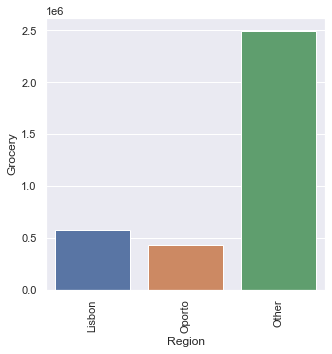

In [40]:
plt.figure(figsize=(5,5))
sns.barplot(x='Region',y='Grocery',data=df_groceryByRegion1,estimator=np.sum,ci=None)
plt.xticks(rotation=90)

In [41]:
df_groceryByChannel=wholesale1.groupby(by='Channel')['Grocery'].sum()
df_groceryByChannel1=df_groceryByChannel.reset_index()

(array([0, 1]), [Text(0, 0, 'Hotel'), Text(1, 0, 'Retail')])

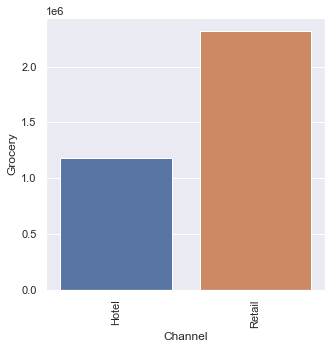

In [42]:
plt.figure(figsize=(5,5))
sns.barplot(x='Channel',y='Grocery',data=df_groceryByChannel1,estimator=np.sum,ci=None)
plt.xticks(rotation=90)

In [43]:
df_frozenByRegion=wholesale1.groupby(by='Region')['Frozen'].sum()
df_frozenByRegion1=df_frozenByRegion.reset_index()

(array([0, 1, 2]),
 [Text(0, 0, 'Lisbon'), Text(1, 0, 'Oporto'), Text(2, 0, 'Other')])

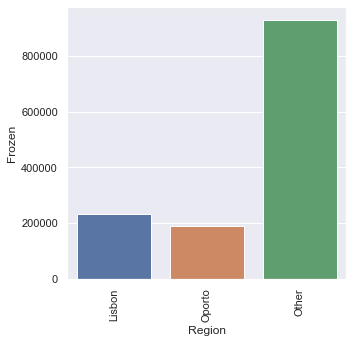

In [44]:
plt.figure(figsize=(5,5))
sns.barplot(x='Region',y='Frozen',data=df_frozenByRegion1,estimator=np.sum,ci=None)
plt.xticks(rotation=90)

In [45]:
df_frozenByChannel=wholesale1.groupby(by='Channel')['Frozen'].sum()
df_frozenByChannel1=df_frozenByChannel.reset_index()

(array([0, 1]), [Text(0, 0, 'Hotel'), Text(1, 0, 'Retail')])

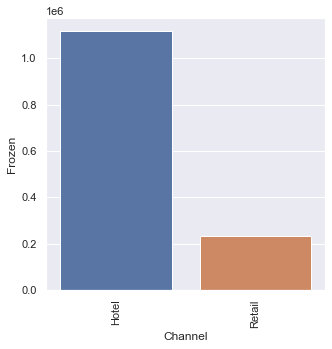

In [46]:
plt.figure(figsize=(5,5))
sns.barplot(x='Channel',y='Frozen',data=df_frozenByChannel1,estimator=np.sum,ci=None)
plt.xticks(rotation=90)

In [47]:
df_detByRegion=wholesale1.groupby(by='Region')['Detergents_Paper'].sum()
df_detByRegion1=df_detByRegion.reset_index()

(array([0, 1, 2]),
 [Text(0, 0, 'Lisbon'), Text(1, 0, 'Oporto'), Text(2, 0, 'Other')])

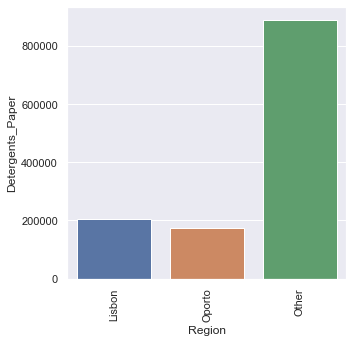

In [48]:
plt.figure(figsize=(5,5))
sns.barplot(x='Region',y='Detergents_Paper',data=df_detByRegion1,estimator=np.sum,ci=None)
plt.xticks(rotation=90)

In [49]:
df_detByChannel=wholesale1.groupby(by='Channel')['Detergents_Paper'].sum()
df_detByChannel1=df_detByChannel.reset_index()

(array([0, 1]), [Text(0, 0, 'Hotel'), Text(1, 0, 'Retail')])

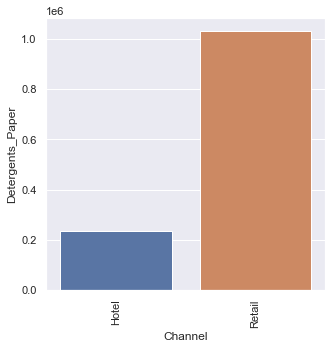

In [50]:
plt.figure(figsize=(5,5))
sns.barplot(x='Channel',y='Detergents_Paper',data=df_detByChannel1,estimator=np.sum,ci=None)
plt.xticks(rotation=90)

In [51]:
df_delicatessenByRegion=wholesale1.groupby(by='Region')['Delicatessen'].sum()
df_delicatessenByRegion1=df_delicatessenByRegion.reset_index()

(array([0, 1, 2]),
 [Text(0, 0, 'Lisbon'), Text(1, 0, 'Oporto'), Text(2, 0, 'Other')])

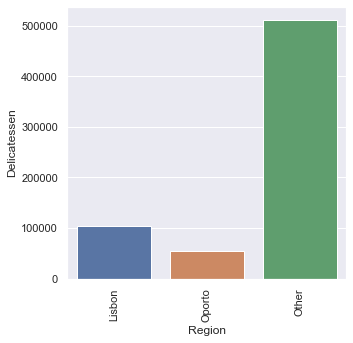

In [52]:
plt.figure(figsize=(5,5))
sns.barplot(x='Region',y='Delicatessen',data=df_delicatessenByRegion1,estimator=np.sum,ci=None)
plt.xticks(rotation=90)

In [53]:
df_delicatessenByChannel=wholesale1.groupby(by='Channel')['Delicatessen'].sum()
df_delicatessenByChannel1=df_delicatessenByChannel.reset_index()

(array([0, 1]), [Text(0, 0, 'Hotel'), Text(1, 0, 'Retail')])

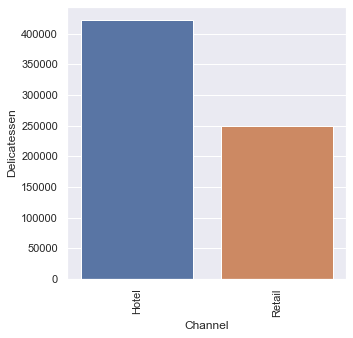

In [54]:
plt.figure(figsize=(5,5))
sns.barplot(x='Channel',y='Delicatessen',data=df_delicatessenByChannel1,estimator=np.sum,ci=None)
plt.xticks(rotation=90)

## As per the above charts we can infer the following points:-
> ## Fresh-
The spending on fresh product is the most in Other region and least in Oporto region.
The spending on fresh product is more in Hotel than in Retail.
> ## Milk-
The spending on milk is the most in Other region and least in Oporto region.
The spending on milk product is more in Retail than in Hotel
> ## Grocery-
The spending on grocery items is the most in Other region and least in Oporto region.
The spending on grocery items is more in Retail than in Hotel.
> ## Frozen-
The spending on frozen items is the most in Other region and least in Oporto region.
The spending on frozen items is more in Hotel than in Retail.
> ## Detergents_Paper-
The spending on Detergents_Paper items is the most in Other region and least in Oporto region.
The spending on Detergents_Paper items is more in Retail than in Hotel.
> ## Delicatessen-
The spending on delicatessen items is the most in Other region and least in Oporto region.
The spending on delicatessen items is more in Hotel than in Retail.

In [55]:
channel_df=wholesale1[wholesale1['Channel']=='Hotel']
channel_df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376,80532.573826
std,13831.687502,4352.165571,3545.513391,5643.912500,1104.093673,3147.426922,66494.517219
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,2712.000000
25%,4070.250000,1164.500000,1703.750000,830.000000,183.250000,379.000000,41577.750000
50%,9581.500000,2157.000000,2684.000000,2057.500000,385.500000,821.000000,63763.500000
75%,18274.750000,4029.500000,5076.750000,4558.750000,899.500000,1548.000000,96341.250000
max,112151.000000,43950.000000,21042.000000,60869.000000,6907.000000,47943.000000,570507.000000


From the above statistics, we can see that for Hotel channel the average spending is highest for Fresh product and the standard deviation is also the highest for Fresh.
Detergents_Paper has the lowest spending.

In [56]:
channel_df=wholesale1[wholesale1['Channel']=='Retail']
channel_df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,139857.697183
std,8987.714750,9679.631351,12267.318094,1812.803662,6291.089697,1953.797047,88040.599472
min,18.000000,928.000000,2743.000000,33.000000,332.000000,3.000000,44979.000000
25%,2347.750000,5938.000000,9245.250000,534.250000,3683.500000,566.750000,90441.750000
50%,5993.500000,7812.000000,12390.000000,1081.000000,5614.500000,1350.000000,111417.000000
75%,12229.750000,12162.750000,20183.500000,2146.750000,8662.500000,2156.000000,154951.500000
max,44466.000000,73498.000000,92780.000000,11559.000000,40827.000000,16523.000000,599673.000000


From the above statistics, we can see that for Retail channel the average spending is highest for Grocery product and the standard deviation is also the highest for Grocery.
Frozen has the lowest spending.

In [57]:
channel_df=wholesale1[wholesale1['Region']=='Lisbon']
channel_df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104,92992.714286
std,11557.438575,5704.856079,8496.287728,3092.143894,4208.462708,1345.423340,60965.441320
min,18.000000,258.000000,489.000000,61.000000,5.000000,7.000000,14775.000000
25%,2806.000000,1372.000000,2046.000000,950.000000,284.000000,548.000000,51552.000000
50%,7363.000000,3748.000000,3838.000000,1801.000000,737.000000,806.000000,76155.000000
75%,15218.000000,7503.000000,9490.000000,4324.000000,3593.000000,1775.000000,116097.000000
max,56083.000000,28326.000000,39694.000000,18711.000000,19410.000000,6854.000000,321465.000000


From the above statistics, we can see that for Lisbon region the average spending is highest for Fresh product and the standard deviation is also the highest for Fresh.
Delicatessen has the lowest spending.

In [58]:
channel_df=wholesale1[wholesale1['Region']=='Oporto']
channel_df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,99260.936170
std,8387.899211,5826.343145,10842.745314,9151.784954,6514.717668,1050.739841,72703.521975
min,3.000000,333.000000,1330.000000,131.000000,15.000000,51.000000,12387.000000
25%,2751.500000,1430.500000,2792.500000,811.500000,282.500000,540.500000,61834.500000
50%,8090.000000,2374.000000,6114.000000,1455.000000,811.000000,898.000000,80859.000000
75%,14925.500000,5772.500000,11758.500000,3272.000000,4324.500000,1538.500000,108475.500000
max,32717.000000,25071.000000,67298.000000,60869.000000,38102.000000,5609.000000,392631.000000


From the above statistics, we can see that for Oporto region the average spending is highest for Fresh product but maximum spending is done on Grocery product with the highest standard deviation.
Delicatessen has the lowest spending.

In [59]:
channel_df=wholesale1[wholesale1['Region']=='Other']
channel_df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spending
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266,101369.610759
std,13389.213115,7935.463443,9537.287778,4260.126243,4593.051613,3232.581660,83848.013255
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,2712.000000
25%,3350.750000,1634.000000,2141.500000,664.750000,251.250000,402.000000,51627.750000
50%,8752.500000,3684.500000,4732.000000,1498.000000,856.000000,994.000000,84087.000000
75%,17406.500000,7198.750000,10559.750000,3354.750000,3875.750000,1832.750000,127476.750000
max,112151.000000,73498.000000,92780.000000,36534.000000,40827.000000,47943.000000,599673.000000


From the above statistics, we can see that for Other region the average spending is highest for Fresh product and the standard deviation is also the highest for Fresh.
Delicatessen has the lowest spending.

## 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [60]:
products = wholesale.iloc[:,3:]

In [61]:
print("Skewness of all the products")
products.apply(lambda col:stats.skew(col),axis=0)

Skewness of all the products


Fresh                2.552583
Milk                 4.039922
Grocery              3.575187
Frozen               5.887826
Detergents_Paper     3.619458
Delicatessen        11.113534
dtype: float64

Skewness factor of all products are > 0. So the distribution of all items are positively Skewed.All the products are not normally distribute about the mean.
So to check the inconsistent behavior of the product , we will check the coefficient of variation as the average spending of all the products varies a lot and also there is a huge standard deviation in the spendings.

In [62]:
products.loc['CV'] = products.apply(lambda col:stats.variation(col),axis=0)

In [63]:
products.loc['CV']

Fresh               1.052720
Milk                1.271851
Grocery             1.193815
Frozen              1.578536
Detergents_Paper    1.652766
Delicatessen        1.847304
Name: CV, dtype: float64

The lowest Coefficient of variation is for Fresh, so it is showing the least inconsistent behavior.
The highest Coefficient of variation is for Delicatessen, so it is showing the most inconsistent behavior.

## 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

In [64]:
products.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,11973.088555,5783.125333,7933.249873,3064.969566,2874.962931,1521.416887
std,12645.864265,7377.148597,9499.903834,4851.357175,4764.407360,2817.832920
min,1.052720,1.271851,1.193815,1.578536,1.652766,1.847304
25%,3103.000000,1530.000000,2147.000000,737.000000,256.000000,406.000000
50%,8475.000000,3620.000000,4754.000000,1517.000000,813.000000,964.000000
75%,16933.000000,7184.000000,10646.000000,3549.000000,3909.000000,1819.000000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


As we can see from the above table that there is a huge gap between the max spending on each product and Q3 . Same goes for the other side, i.e., there is a huge difference between min spending and Q1 of each product.
So, we will plot a boxplot for each product to check if the particular product has outliers or not.

C:\Users\ikrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ikrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ikrit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ikrit\anaconda3\lib\si

<AxesSubplot:xlabel='Delicatessen'>

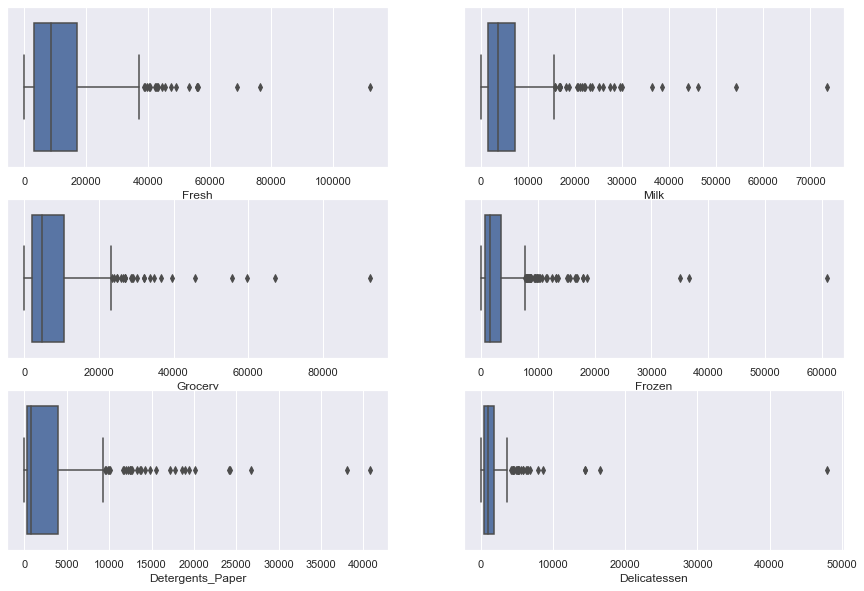

In [65]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.boxplot(products['Fresh'])
plt.subplot(3,2,2)
sns.boxplot(products['Milk'])
plt.subplot(3,2,3)
sns.boxplot(products['Grocery'])
plt.subplot(3,2,4)
sns.boxplot(products['Frozen'])
plt.subplot(3,2,5)
sns.boxplot(products['Detergents_Paper'])
plt.subplot(3,2,6)
sns.boxplot(products['Delicatessen'])

As per the above plots, outliers are present for all the products in the dataset due to which there is a huge standard deviation and the average of the spending is also not appropriate.

## 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

1. Maximum spending is done in Other region and the least is done in Oporto . There is a need to increase the sales in Lisbon and Oporto region.
2. Hotel channel is spending more on the products than the Retail. So, the Customers should be encouraged to buy the products from these retail stores which can be influenced by introducing some discounts or offers.
3. Milk, Grocery and Detergents paper is showing more spending in Retail which means demand for these items are more in the retail stores.
4. Likewise, Fresh, frozen and delicatessen product has more spending in Hotel which shows that fancy items has more demand in Hotels than in Retails.
5. Lisbon region has a high demand of fresh products.
6. Oporto region has the highest demand of grocery items.
7. Other region has a high demand of fresh products.
8. Fresh and grocery products have very good sales, so some efforts should be done in order to increase the sales of the remaining products. 
9. The dataset has outliers for each product which makes the data inconsistent.
10. The standard deviation for each product is very high which should be reduced in order to get a better picture.

## Problem 2: The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [66]:
survey_df=pd.read_csv('Survey-1.csv')
survey_df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [67]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


There are a total of 14 columns in the dataset out of which 2 columns are of float type, 6 are of integer type and 6 are of object type.

In [68]:
survey_df.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

The dataset is clean as there are no null values in it. So, there is no need to clean the data.

## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

## 2.1.1. Contingency table for Gender and Major

In [70]:
gender_major = pd.crosstab(survey_df['Gender'],survey_df['Major'])
gender_major.loc['Total'] = gender_major.apply(lambda col:np.sum(col),axis=0)
gender_major['Total'] = gender_major.apply(lambda row:np.sum(row),axis=1)
gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


## 2.1.2. Contingency table for Gender and Grad Intention

In [71]:
gender_grad = pd.crosstab(survey_df['Gender'],survey_df['Grad Intention'])
gender_grad.loc['Total'] = gender_grad.apply(lambda col:np.sum(col),axis=0)
gender_grad['Total'] = gender_grad.apply(lambda row:np.sum(row),axis=1)
gender_grad

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


## 2.1.3. Contingency table for Gender and Employment

In [72]:
gender_emp = pd.crosstab(survey_df['Gender'],survey_df['Employment'])
gender_emp.loc['Total'] = gender_emp.apply(lambda col:np.sum(col),axis=0)
gender_emp['Total'] = gender_emp.apply(lambda row:np.sum(row),axis=1)
gender_emp

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


## 2.1.4. Contingency table for Gender and Computer

In [73]:
gender_comp = pd.crosstab(survey_df['Gender'],survey_df['Computer'])
gender_comp.loc['Total'] = gender_comp.apply(lambda col:np.sum(col),axis=0)
gender_comp['Total'] = gender_comp.apply(lambda row:np.sum(row),axis=1)
gender_comp

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [58]:
total_students=survey_df.shape[0]
total_male=survey_df['Gender'].value_counts().loc['Male']
p_male=(total_male)/(total_students)
print("Probability that a randomly selected CMSU will be male is :",round(p_male,3))

Probability that a randomly selected CMSU will be male is : 0.468


### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [59]:
total_female=survey_df['Gender'].value_counts().loc['Female']
p_female=(total_female)/(total_students)
print("Probability that a randomly selected CMSU will be female is :",round(p_female,3))

Probability that a randomly selected CMSU will be female is : 0.532


## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [60]:
gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [61]:
p_maleAccounting=gender_major.loc['Male','Accounting']/gender_major.loc['Male','Total']
p_maleCIS=gender_major.loc['Male','CIS']/gender_major.loc['Male','Total']
p_maleEcoFinance=gender_major.loc['Male','Economics/Finance']/gender_major.loc['Male','Total']
p_maleintBusiness=gender_major.loc['Male','International Business']/gender_major.loc['Male','Total']
p_maleManagement=gender_major.loc['Male','Management']/gender_major.loc['Male','Total']
p_maleOther=gender_major.loc['Male','Other']/gender_major.loc['Male','Total']
p_maleRetail=gender_major.loc['Male','Retailing/Marketing']/gender_major.loc['Male','Total']
p_maleUndecided=gender_major.loc['Male','Undecided']/gender_major.loc['Male','Total']

In [62]:
print("Probability of male students having major in Accounting is: ",round(p_maleAccounting,2))
print("Probability of male students having major in CIS is: ",round(p_maleCIS,2))
print("Probability of male students having major in Economics/Finance is: ",round(p_maleEcoFinance,2))
print("Probability of male students having major in International Business is: ",round(p_maleintBusiness,2))
print("Probability of male students having major in Management is: ",round(p_maleManagement,2))
print("Probability of male students having major in some other subject is: ",round(p_maleOther,2))
print("Probability of male students having major in Retailing/Marketing is",round(p_maleRetail,2))
print("Probability of male students who have not decided about their major is",round(p_maleUndecided,2))

Probability of male students having major in Accounting is:  0.14
Probability of male students having major in CIS is:  0.03
Probability of male students having major in Economics/Finance is:  0.14
Probability of male students having major in International Business is:  0.07
Probability of male students having major in Management is:  0.21
Probability of male students having major in some other subject is:  0.14
Probability of male students having major in Retailing/Marketing is 0.17
Probability of male students who have not decided about their major is 0.1


## 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [63]:
p_femaleAccounting=gender_major.loc['Female','Accounting']/gender_major.loc['Female','Total']
p_femaleCIS=gender_major.loc['Female','CIS']/gender_major.loc['Female','Total']
p_femaleEcoFinance=gender_major.loc['Female','Economics/Finance']/gender_major.loc['Female','Total']
p_femaleintBusiness=gender_major.loc['Female','International Business']/gender_major.loc['Female','Total']
p_femaleManagement=gender_major.loc['Female','Management']/gender_major.loc['Female','Total']
p_femaleOther=gender_major.loc['Female','Other']/gender_major.loc['Female','Total']
p_femaleRetail=gender_major.loc['Female','Retailing/Marketing']/gender_major.loc['Female','Total']
p_femaleUndecided=gender_major.loc['Female','Undecided']/gender_major.loc['Female','Total']

In [64]:
print("Probability of female students having major in Accounting is: ",round(p_femaleAccounting,2))
print("Probability of female students having major in CIS is: ",round(p_femaleCIS,2))
print("Probability of female students having major in Economics/Finance is: ",round(p_femaleEcoFinance,2))
print("Probability of female students having major in International Business is: ",round(p_femaleintBusiness,2))
print("Probability of female students having major in Management is: ",round(p_femaleManagement,2))
print("Probability of female students having major in some other subject is: ",round(p_femaleOther,2))
print("Probability of female students having major in Retailing/Marketing is",round(p_femaleRetail,2))
print("Probability of female students who have not decided about their major is",round(p_femaleUndecided,2))

Probability of female students having major in Accounting is:  0.09
Probability of female students having major in CIS is:  0.09
Probability of female students having major in Economics/Finance is:  0.21
Probability of female students having major in International Business is:  0.12
Probability of female students having major in Management is:  0.12
Probability of female students having major in some other subject is:  0.09
Probability of female students having major in Retailing/Marketing is 0.27
Probability of female students who have not decided about their major is 0.0


## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

## 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [65]:
gender_grad

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [66]:
p_maleYesToGrad=gender_grad.loc['Male','Yes']/gender_grad.loc['Total','Total']

In [67]:
print("Probability of male students who intends to Graduate is: ",round(p_maleYesToGrad,2))

Probability of male students who intends to Graduate is:  0.27


## 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [68]:
gender_comp

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [69]:
femaleWithNoLaptop=(gender_comp.loc['Female','Total'])-(gender_comp.loc['Female','Laptop'])
total_students=gender_comp.loc['Total','Total']

In [70]:
p_femaleWithNoLaptop=femaleWithNoLaptop/total_students

In [71]:
print('Probability that a randomly selected student is a female and does not have a laptop :',round(p_femaleWithNoLaptop,2))

Probability that a randomly selected student is a female and does not have a laptop : 0.06


## 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [72]:
gender_emp

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [73]:
p_male=gender_emp.loc['Male','Total']/gender_emp.loc['Total','Total']
p_fullTimeEmp=gender_emp.loc['Total','Full-Time']/gender_emp.loc['Total','Total']
p_maleFullTimeEmp=gender_emp.loc['Male','Full-Time']/gender_emp.loc['Total','Total']
p_maleOrFullTimeEmp=(p_male+p_fullTimeEmp)-p_maleFullTimeEmp
print('Probability that a randomly selected student is a male or has full time employment:',round(p_maleOrFullTimeEmp,2))

Probability that a randomly selected student is a male or has full time employment: 0.52


## 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [74]:
gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [75]:
p_femaleIntBus=gender_major.loc['Female','International Business']/gender_major.loc['Female','Total']
p_femaleMgmt=gender_major.loc['Female','Management']/gender_major.loc['Female','Total']
p_femaleIntBusOrMgmt=p_femaleIntBus+p_femaleMgmt
print('Probability that given a female student is randomly chosen, she is majoring in international business or management',round(p_femaleIntBusOrMgmt,2))

Probability that given a female student is randomly chosen, she is majoring in international business or management 0.24


## 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [76]:
#Filtering out the value Undecided from column Grad Intention
grad_intent=survey_df[survey_df['Grad Intention'] !='Undecided']

In [77]:
gender_gradIntent = pd.crosstab(grad_intent['Gender'],grad_intent['Grad Intention'])
gender_gradIntent.loc['Total'] = gender_gradIntent.apply(lambda col:np.sum(col),axis=0)
gender_gradIntent['Total'] = gender_gradIntent.apply(lambda row:np.sum(row),axis=1)
gender_gradIntent

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,20
Male,3,17,20
Total,12,28,40


In [78]:
#For two events to be independent , p(A and B) should be equal to P(A)*P(B).
p_female=gender_gradIntent.loc['Female','Total']/gender_gradIntent.loc['Total','Total']
p_yesGradIntent=gender_gradIntent.loc['Total','Yes']/gender_gradIntent.loc['Total','Total']
p_femaleAndYesGradIntent=gender_gradIntent.loc['Female','Yes']/gender_gradIntent.loc['Total','Total']
check=p_female*p_yesGradIntent
if (check==p_femaleAndYesGradIntent):
    print('Graduate intention and being female are independent events')
else:
    print('Graduate intention and being female are not independent events')

Graduate intention and being female are not independent events


## 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

## 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [79]:
total_students=survey_df.shape[0]
studentsWithGPALessThan3=survey_df[survey_df['GPA']<3].shape[0]
p_studentsWithGPALessThan3=studentsWithGPALessThan3/total_students
print('Probability that GPA of a student is less than 3 is',round(p_studentsWithGPALessThan3,2))

Probability that GPA of a student is less than 3 is 0.27


## 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [80]:
total_male_students=survey_df[survey_df['Gender']=='Male'].shape[0]
total_female_students=survey_df[survey_df['Gender']=='Female'].shape[0]
male_earning_moreThan50=survey_df[(survey_df['Gender']=='Male') & (survey_df['Salary']>=50)].shape[0]
female_earning_moreThan50=survey_df[(survey_df['Gender']=='Female') & (survey_df['Salary']>=50)].shape[0]
p_male_salaryMoreThan50=male_earning_moreThan50/total_male_students
p_female_salaryMoreThan50=female_earning_moreThan50/total_female_students
print('Conditional probability that a randomly selected male earns 50 or more is:',round(p_male_salaryMoreThan50,2))
print('Conditional probability that a randomly selected female earns 50 or more is:',round(p_female_salaryMoreThan50,2))

Conditional probability that a randomly selected male earns 50 or more is: 0.48
Conditional probability that a randomly selected female earns 50 or more is: 0.55


## 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

To check if the numerical continuous variables of the survey dataset  follow a normal distribution or not, we will first plot the distplot , so that we can see the KDE of the particular variable

C:\Users\ikrit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ikrit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ikrit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

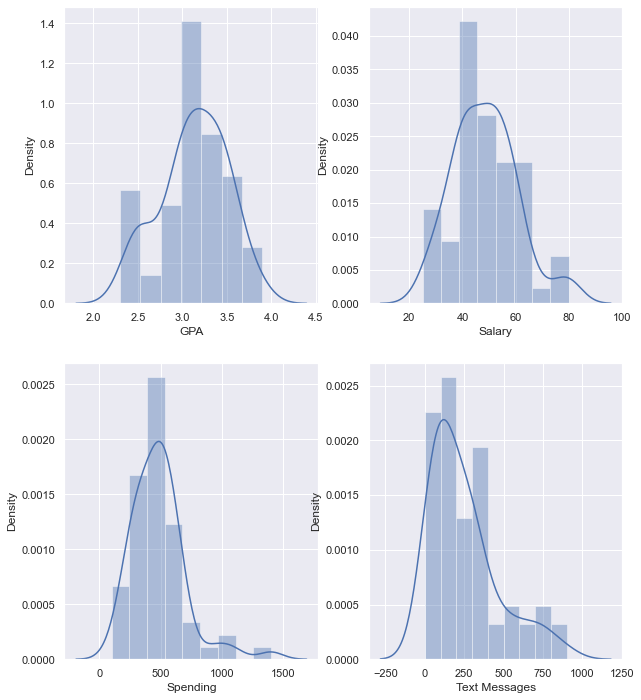

In [81]:
plt.figure(figsize=(10,12))
plt.subplot(2,2,1)
sns.distplot(survey_df['GPA'])
plt.subplot(2,2,2)
sns.distplot(survey_df['Salary'])
plt.subplot(2,2,3)
sns.distplot(survey_df['Spending'])
plt.subplot(2,2,4)
sns.distplot(survey_df['Text Messages'])
plt.show()

From the above plots, we can see that Salary and GPA are almost normally distributed but Spendings and Text messages seems to be somewhat rightwards skewed.
To confirm we will now test if the mean , median and mode of these variables lie at the same place or not. If they lie at the same place, the variable should be normally distributed , else not.

In [82]:
print('Mean of GPA :',survey_df['GPA'].mean())
print('Median of GPA :',survey_df['GPA'].median())
print('Mode of GPA :',survey_df['GPA'].mode())

Mean of GPA : 3.129032258064516
Median of GPA : 3.1500000000000004
Mode of GPA : 0    3.0
1    3.1
2    3.4
dtype: float64


In [83]:
print('Mean of Salary :',survey_df['Salary'].mean())
print('Median of Salary :',survey_df['Salary'].median())
print('Mode of Salary :',survey_df['Salary'].mode())

Mean of Salary : 48.54838709677419
Median of Salary : 50.0
Mode of Salary : 0    40.0
dtype: float64


In [84]:
print('Mean of Spending :',survey_df['Spending'].mean())
print('Median of Spending :',survey_df['Spending'].median())
print('Mode of Spending :',survey_df['Spending'].mode())

Mean of Spending : 482.01612903225805
Median of Spending : 500.0
Mode of Spending : 0    500
dtype: int64


In [85]:
print('Mean of Text Messages :',survey_df['Text Messages'].mean())
print('Median of Text Messages :',survey_df['Text Messages'].median())
print('Mode of Text Messages :',survey_df['Text Messages'].mode())

Mean of Text Messages : 246.20967741935485
Median of Text Messages : 200.0
Mode of Text Messages : 0    300
dtype: int64


From the above calculations, we see here that mean ,median and mode of GPA is very close, but for Salary, Spending and Text Messages we can't say the same. 

To confirm the above inferences, we will now check the skewness factor and also do the Shapiro test which will give us a confirmation on the distribution type of these numeric variables.

In [86]:
print('Skewness factor of GPA is: ',survey_df['GPA'].skew())
print('Skewness factor of Salary is: ',survey_df['Salary'].skew())
print('Skewness factor of Spending is: ',survey_df['Spending'].skew())
print('Skewness factor of Text Messages is: ',survey_df['Text Messages'].skew())

Skewness factor of GPA is:  -0.3146000894506981
Skewness factor of Salary is:  0.5347008436225946
Skewness factor of Spending is:  1.5859147414045331
Skewness factor of Text Messages is:  1.2958079731054333


In [87]:
list_var=['GPA','Salary','Spending','Text Messages']
for var in list_var:
    statistics,p_value=stats.shapiro(survey_df[var])
    print("Shapiro test p_value of "+var+" is {:.5f}".format(p_value))

Shapiro test p_value of GPA is 0.11204
Shapiro test p_value of Salary is 0.02800
Shapiro test p_value of Spending is 0.00002
Shapiro test p_value of Text Messages is 0.00000


From the above calculations for skewness factor and shapiro test, we see that skewness of only GPA lies in the range of -0.5 to 0.5 which proves it to be normally distributed.
Also, the result of shapiro test shows us that only GPA has its p_value greater than the significance level, i.e, 0.05. So out of all the four numeric variables, only GPA is normally distributed and other variables are slightly skewed.

## Problem 3: An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

In [88]:
shingles_df=pd.read_csv('A+&+B+shingles.csv')

In [89]:
shingles_df.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


## 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

## Step1: Defining the null and alternative hypothesis
> ## H0: mean_moisture_content<= 0.35 pounds per 100 square feet (Null Hypothesis)
> ## H1: mean_moisture_content> 0.35 pounds per 100 square feet (Alternative Hypothesis)

## Step2: Defining the significance level(alpha)
> ## alpha=0.05 (Here, we are taking the default value of alpha i.e., 5% significance level as it is not mentioned in the problem statement)

## Step3: Selecting Test Statistics
> ### We are testing hypothesis for two types of Shingles separately  and as per the hypothesis statements and given data one sample T-Test will be used. It is a one tailed test ( Left direction). Since, population standard deviation value is not known we are not considering normal distribution test.

## Step4: Compute p-value and T-statistics

In [90]:
from scipy.stats import ttest_1samp

> ## scipy.stats.ttest_1samp calculates the t test for the mean of one sample given the sample observations and the expected value in the null hypothesis. This function returns t statistic and the two-tailed p value

In [91]:
# For Type A Shingles 
n = 36
mu = 0.35  # Hypothetical Mean
x_bar_A = shingles_df['A'].mean() # Sample Mean
std_A = shingles_df['A'].std() # Sample Standard Deviation
dof = n-1
t_statistics_A,p_value_A = ttest_1samp(shingles_df['A'],mu,alternative='greater')
print("One Sample T-Test Results For Type A Shingles")
print("Test_Statistics_A :{0}, P_Value_A: {1}".format(t_statistics_A,p_value_A))    #Here we get p_value for two tailed t Test 

One Sample T-Test Results For Type A Shingles
Test_Statistics_A :-1.4735046253382782, P_Value_A: 0.9252236685509249


In [92]:
# For Type B Shingles
# There are null values in data set we wil clean data first
shingles_df_B = shingles_df['B'].dropna()

type_b_observations = shingles_df_B.shape[0]
x_bar_B = shingles_df_B.mean() # Sample Mean
std_B = shingles_df_B.std() # Sample Standard Deviation

t_statistics_B,p_value_B = ttest_1samp(shingles_df_B,mu,alternative='greater')
print("One Sample T-Test Results For Type B Shingles")
print("Test_Statistics_B :{0}, P_Value_B: {1}".format(t_statistics_B,p_value_B))    #Here we get p_value for two tailed t Test so for one tailed test we have to divide balue by 2 



One Sample T-Test Results For Type B Shingles
Test_Statistics_B :-3.1003313069986995, P_Value_B: 0.9979095225996808


## Step5: Either accept or reject Null Hypothesis based on the value of p

In [93]:
alpha = 0.05
print("Level of Significance",alpha)
print("\nFor Type A Shingles")
if(p_value_A>alpha):
    print("We fail to reject null hyopthesis since P Value is greater than 5% Level of Significance")
else:
     print("We reject null hyopthesis since P Value is less than 5% Level of Significance")
        
print("\nFor Type B Shingles")
if(p_value_B>alpha):
    print("We fail to reject null hypothesis  since P Value is greater than 5% Level of Significance")
else:
     print("We reject null hypothesis  since P Value is less than 5% Level of Significance")

Level of Significance 0.05

For Type A Shingles
We fail to reject null hyopthesis since P Value is greater than 5% Level of Significance

For Type B Shingles
We fail to reject null hypothesis  since P Value is greater than 5% Level of Significance


## Step 6 Conclusion
> ## Type A Shingles
>> ## From the hypothesis test, we see that we do not have enough evidence to reject null hypothesis at 95% confidence level, which means that mean moisture content of Type A shingle is less than or equal to 0.35 pounds per 100 square feet.
>
> ## Type B Shingles
>> ## From the hypothesis test, we see that we do not have enough evidence to reject null hypothesis at 95% confidence level, which means that mean moisture content of Type B shingle is less than or equal to 0.35 pounds per 100 square feet.

## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

> ## We will be performing the two sample t-test.
> ## Assumptions to perform the two sample T-test are:
>>## - The samples for Type A shingle and Type b shingle are independent of one another
>>## - Data for each type of shingle is obtained by random sampling from the population
>>## - The populations from which the data in each group is taken must is normally distributed

## Step1: Defining the null and alternative hypothesis
> ## H0: mu_A=mu_B i.e, population mean of type A shingle= population mean of Type b shingle (Null Hypothesis)
> ## H1: mu_A!=mu_B i.e, population mean of type A shingle!= population mean of Type b shingle (Alternative Hypothesis)

## Step2: Defining the significance level(alpha)
> ## alpha=0.05 (Here, we are taking the default value of alpha i.e., 5% significance level as it is not mentioned in the problem statement)

## Step 3 - Selecting Test Statistics
> ### In This problem we have to compare the population means of Two  Independent Shingles Type i.e. Type A and Type B. So we will make use of Two Independent Sample T-Test. 

## Step 4 Compute P value and T-Statistics
> ## We use the scipy.stats.ttest_ind to calculate the t-test for the population means of TWO INDEPENDENT samples of types of  Shingles given the two sample observations. This function returns t statistic and two-tailed p value.
> ## This is a two-sided test for the null hypothesis that 2 independent samples have identical population means (expected) values. This test assumes that the populations have identical variances.

In [94]:
from scipy.stats import ttest_ind

In [95]:
t_statistic_two_sample, p_value_two_sample  = ttest_ind(shingles_df['A'],shingles_df['B'].dropna())
print("Two Independent Samples T-Test Results \n")
print('T_statistics:-',t_statistic_two_sample)    
print('P_value:-',p_value_two_sample)    

Two Independent Samples T-Test Results 

T_statistics:- 1.289628271966112
P_value:- 0.2017496571835328


## Step5: Either accept or reject Null Hypothesis based on the value of p

In [96]:
alpha = 0.05
print("Level of Significance",alpha)

if(p_value_two_sample>alpha):
    print("We don't have enough evidences to reject null hypothesis  since P Value is greater than 5% Level of Significance")
else:
     print("We have enough evidences to reject null hypothesis  since P Value is less than 5% Level of Significance")


Level of Significance 0.05
We don't have enough evidences to reject null hypothesis  since P Value is greater than 5% Level of Significance


## Step 6 Conclusion
>> ## Basis the hypothesis test performance for the given samples of Type A and Type B Shingles  at 95% Confidence level  we failed to reject the null hypothesis i.e. There are not enough evidence to prove that population  mean moisture content of type A and type B are not equal. So population mean for sample data of type A and Type B Shingles are equal